In [2]:
def three_body(G=1,m1=15,m2=12,m3=8,x1=300,y1=50,x2=-100,y2=-200,x3=-100,y3=150,v1_x=0,v1_y=0,v2_x=0,v2_y=0,v3_x=0,v3_y=0,t=0.1,observation_max = 100):
    import numpy as np
    import matplotlib.pyplot as plt
    import os
    plt.ion()  # 开启交互模式
    x1_all = [x1]  # 轨迹初始值
    y1_all = [y1]
    x2_all = [x2]
    y2_all = [y2]
    x3_all = [x3]
    y3_all = [y3]

    i0 = 0
    for i in range(1000000):  
        distance12 = np.sqrt((x1-x2)**2+(y1-y2)**2)   # 物体1和物体2之间的距离
        distance13 = np.sqrt((x1-x3)**2+(y1-y3)**2)   # 物体1和物体3之间的距离
        distance23 = np.sqrt((x2-x3)**2+(y2-y3)**2)   # 物体2和物体3之间的距离
        # 对物体1的计算
        a1_2 = G*m2/(distance12**2)  # 物体2对物体1的加速度（用上万有引力公式）
        a1_3 = G*m3/(distance13**2)  # 物体3对物体1的加速度
        a1_x = a1_2*(x2-x1)/distance12 + a1_3*(x3-x1)/distance13  # 物体1受到的水平加速度
        a1_y = a1_2*(y2-y1)/distance12 + a1_3*(y3-y1)/distance13  # 物体1受到的垂直加速度
        v1_x = v1_x + a1_x*t  # 物体1的速度
        v1_y = v1_y + a1_y*t  # 物体1的速度
        x1 = x1 + v1_x*t  # 物体1的水平位置
        y1 = y1 + v1_y*t  # 物体1的垂直位置
        x1_all = np.append(x1_all, x1)  # 记录轨迹
        y1_all = np.append(y1_all, y1)  # 记录轨迹
        # 对物体2的计算
        a2_1 = G*m1/(distance12**2)
        a2_3 = G*m3/(distance23**2)
        a2_x = a2_1*(x1-x2)/distance12 + a2_3*(x3-x2)/distance23
        a2_y = a2_1*(y1-y2)/distance12 + a2_3*(y3-y2)/distance23
        v2_x = v2_x + a2_x*t
        v2_y = v2_y + a2_y*t
        x2 = x2 + v2_x*t
        y2 = y2 + v2_y*t
        x2_all = np.append(x2_all, x2)
        y2_all = np.append(y2_all, y2)
        # 对物体3的计算
        a3_1 = G*m1/(distance13**2)
        a3_2 = G*m2/(distance23**2)
        a3_x = a3_1*(x1-x3)/distance13 + a3_2*(x2-x3)/distance23
        a3_y = a3_1*(y1-y3)/distance13 + a3_2*(y2-y3)/distance23
        v3_x = v3_x + a3_x*t
        v3_y = v3_y + a3_y*t
        x3 = x3 + v3_x*t
        y3 = y3 + v3_y*t
        x3_all = np.append(x3_all, x3)
        y3_all = np.append(y3_all, y3)
        axis_x = np.mean([x1, x2, x3])
        axis_y = np.mean([y1, y2, y3])
        while True:
            if np.abs(x1-axis_x) > observation_max or np.abs(x2-axis_x) > observation_max or np.abs(x3-axis_x) > observation_max or\
            np.abs(y1-axis_y) > observation_max or np.abs(y2-axis_y) > observation_max or np.abs(y3-axis_y) > observation_max:
                observation_max = observation_max * 2
            elif np.abs(x1-axis_x) < observation_max/10 and np.abs(x2-axis_x) < observation_max/10 and np.abs(x3-axis_x) < observation_max/10 and\
            np.abs(y1-axis_y) < observation_max/10 and np.abs(y2-axis_y) < observation_max/10 and np.abs(y3-axis_y) < observation_max/10:
                observation_max = observation_max / 2
            else:
                break
        plt.axis([axis_x-observation_max, axis_x+observation_max, axis_y-observation_max,  axis_y+observation_max])

        plt.plot(x1, y1, 'og', markersize=m1*100/observation_max)
        plt.plot(x2, y2, 'or', markersize=m2*100/observation_max) 
        plt.plot(x3, y3, 'ob', markersize=m3*100/observation_max)
        plt.plot(x1_all, y1_all, '-g')
        plt.plot(x2_all, y2_all, '-r')
        plt.plot(x3_all, y3_all, '-b')
        print(i0)
        plt.savefig(str(i0)+'.jpg')
        plt.show()
        print("saveing...")
        i0 += 1
        plt.clf()

In [3]:
def save_gif(save_path="three_body_problem.gif", duration=100):
    import os
    from PIL import Image
    count = 0
    images = []
    for i in range(len(os.listdir())):
        if os.listdir()[i].split(".")[1] == "jpg":
            count += 1
    for i in range(count):
        im = Image.open(str(i)+".jpg")
        images.append(im)
    images[0].save(save_path,save_all=True,loop=True,append_images=images[1:],duration=duration)

0


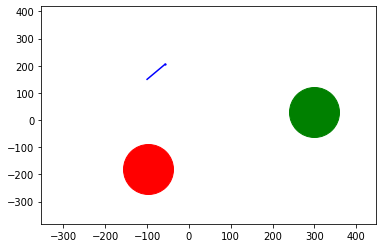

saveing...
1


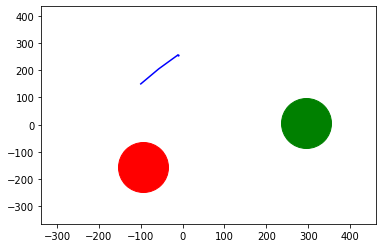

saveing...
2


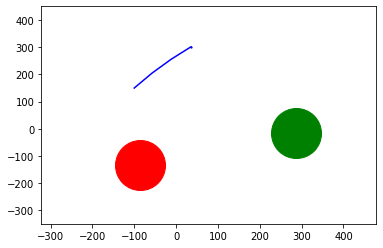

saveing...
3


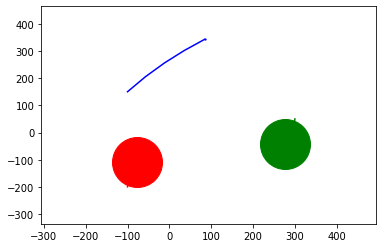

saveing...
4


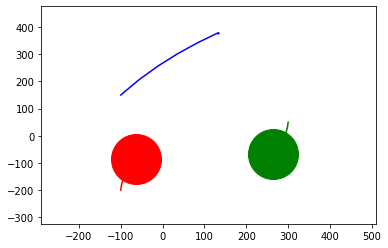

saveing...
5


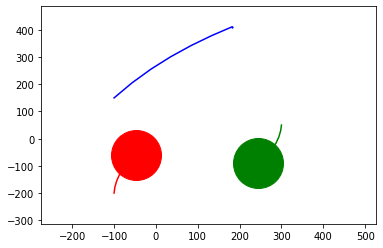

saveing...
6


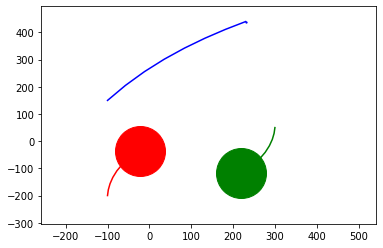

saveing...
7


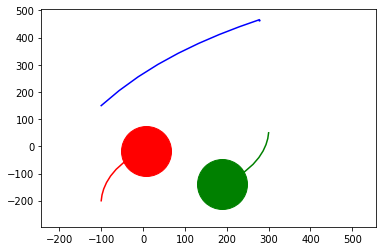

saveing...
8


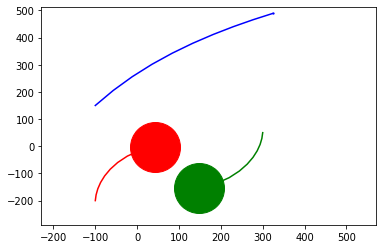

saveing...
9


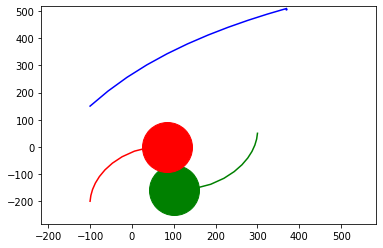

saveing...
10


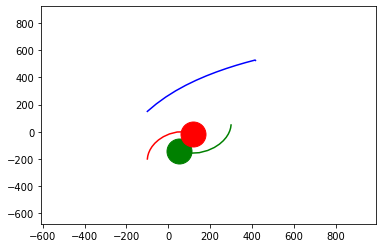

saveing...
11


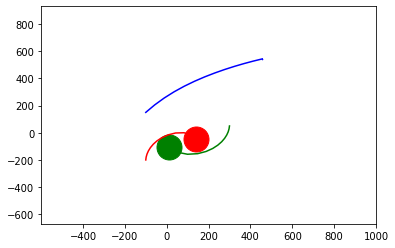

saveing...
12


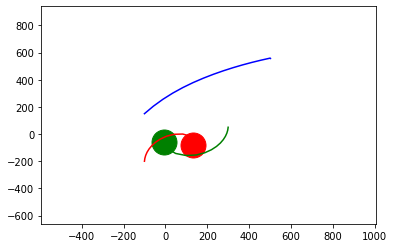

saveing...
13


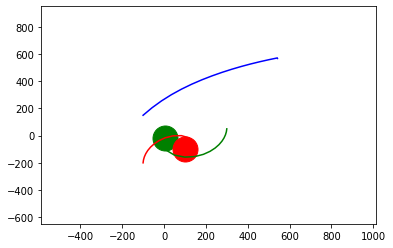

saveing...
14


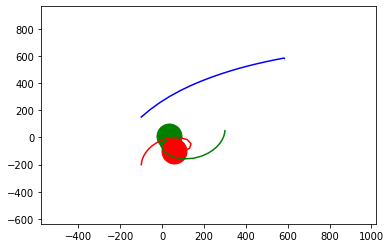

saveing...
15


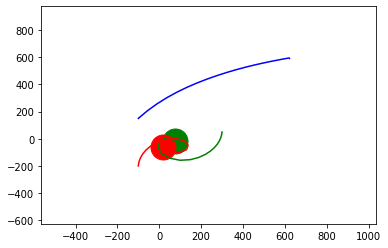

saveing...
16


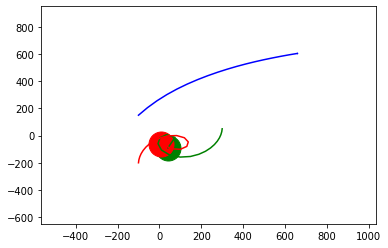

saveing...
17


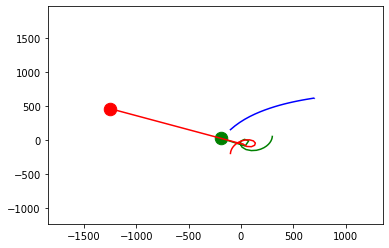

saveing...
18


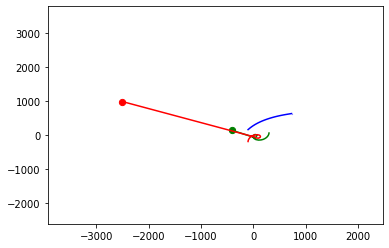

saveing...
19


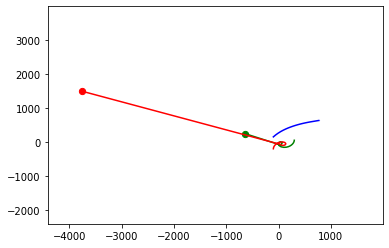

saveing...
20


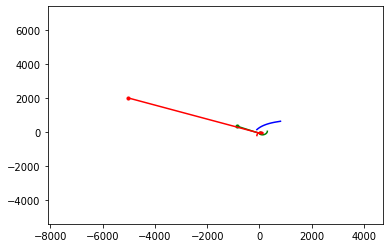

saveing...
21


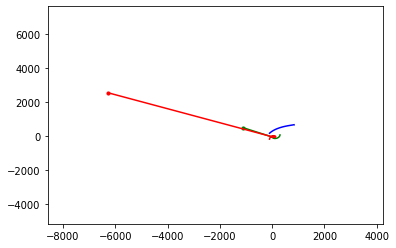

saveing...
22


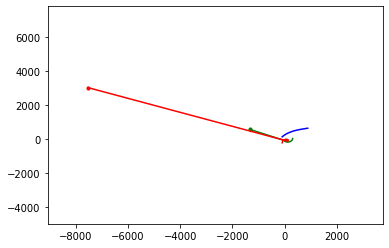

saveing...
23


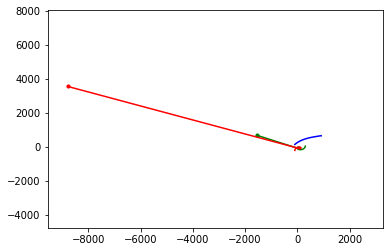

saveing...
24


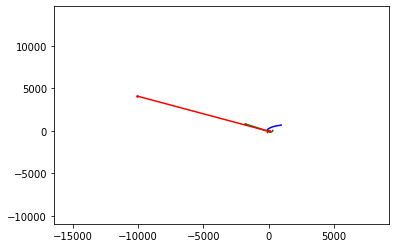

saveing...
25


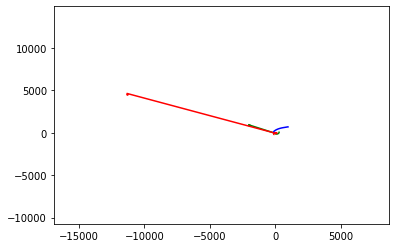

saveing...
26


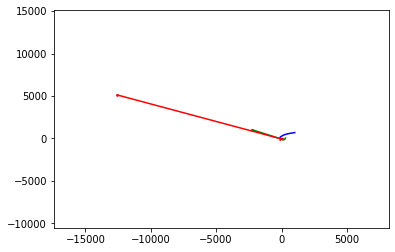

saveing...
27


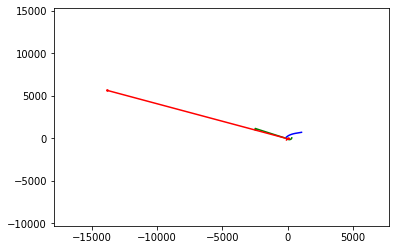

saveing...
28


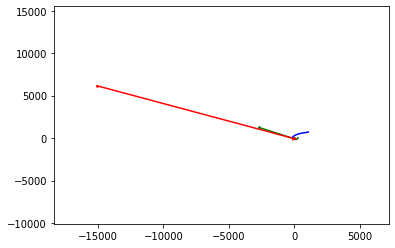

saveing...
29


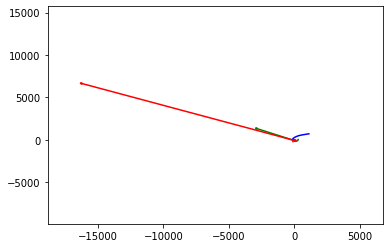

saveing...
30


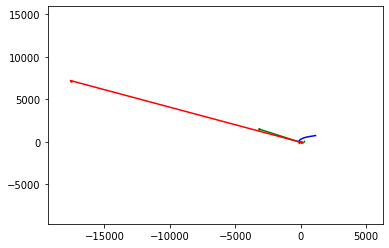

saveing...
31


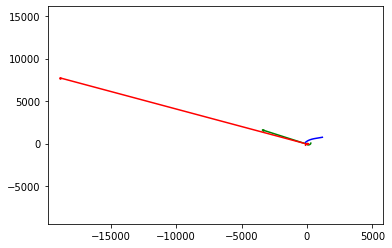

saveing...
32


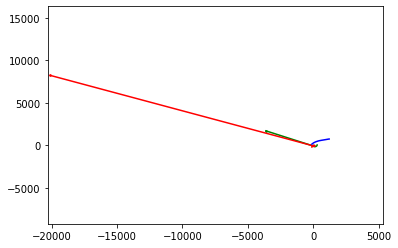

saveing...
33


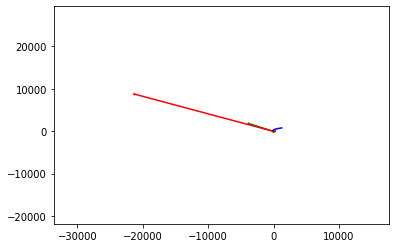

saveing...
34


KeyboardInterrupt: 

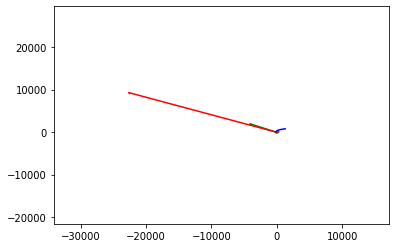

In [61]:
three_body(m1=200,m2=200,m3=5,v1_y=-0.4,v2_y=0.4,v3_y=1.2,v3_x=0.8,t=50)